In [1]:
!python -V

Python 3.10.9


In [2]:
#!pip install pyarrow
#!pip install fastparquet

In [3]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
print(df.shape)

df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

(2463931, 19)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,2.463931e+06,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06,2.463931e+06
mean,1.707819e+00,1.389453e+00,5.372751e+00,1.415507e+00,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02,1.421220e+01
std,5.021375e-01,9.829686e-01,5.478714e+02,5.917573e+00,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01,4.644531e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00,-3.442400e+03
25%,1.000000e+00,1.000000e+00,1.040000e+00,1.000000e+00,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00,6.316667e+00
50%,2.000000e+00,1.000000e+00,1.740000e+00,1.000000e+00,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00,1.018333e+01
75%,2.000000e+00,1.000000e+00,3.130000e+00,1.000000e+00,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00,1.616667e+01
max,6.000000e+00,9.000000e+00,3.061593e+05,9.900000e+01,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00,8.513183e+03


In [7]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [8]:
2421440/2463931

0.9827547930522406

In [9]:
dv = DictVectorizer()

In [10]:
list_of_dicts = df[categorical].to_dict(orient='records')

In [11]:
# Fit the vectorizer and transform the data into a feature matrix
X_train = dv.fit_transform(list_of_dicts)

# Convert the feature matrix to an array
fm_array = X_train.toarray()

# Print the dimensionality of the feature matrix
dimensionality = fm_array.shape
print("Dimensionality:", dimensionality)

Dimensionality: (2421440, 515)


In [12]:
target = 'duration'
y_train = df[target].values

In [13]:
# instantiate linear regression model with default parameters
lr = LinearRegression()

# fit model to training data
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# get predictions
y_pred = lr.predict(X_train)

In [15]:
# calculate RMSE
mean_squared_error(y_train, y_pred, squared=False) # squared = False so this is root MSE (RMSE)

6.986190836477672

In [16]:
#Evaluation

In [17]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df


def get_features(df, dv = None, mode = 'train', categorical = ['PULocationID', 'DOLocationID']):
    dicts = df[categorical].to_dict(orient='records')
    # Instantiate a dictionary vectorizer
    if mode == 'train':
        dv = DictVectorizer()
        X = dv.fit_transform(dicts)
    if mode == 'eval':
        X = dv.transform(dicts)
    return X

In [18]:
df_feb = read_dataframe('./data/yellow_tripdata_2022-02.parquet')

In [19]:
X_val = get_features(df_feb, dv, mode = 'eval')
y_val = df_feb['duration']

In [20]:
X_val.shape

(2918187, 515)

In [21]:
X_train.shape

(2421440, 515)

In [22]:
y_pred = lr.predict(X_val)

In [23]:
y_val = df_feb['duration'].values

In [24]:
mean_squared_error(y_val, y_pred, squared=False)

7.78640879016696

/tmp/ipykernel_1866/2624495092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_1866/2624495092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')


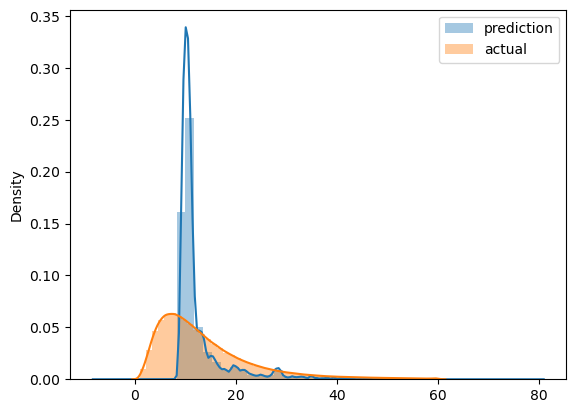

In [25]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [26]:
lr = Lasso() # default parameters
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

9.708201793164015